In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import torch

import os
import pickle
import blosc

from pprint import pprint
import re

In [2]:
bond_angles={}

with open("corrected_BondAngles.pickle", "rb") as f:
    compressed_pickle = f.read()

#depressed_pickle = blosc.decompress(compressed_pickle)
bond_angles.update(pickle.loads(compressed_pickle))

In [3]:
len(bond_angles)

1486

In [4]:
for key in bond_angles:
    print(key)

Cl - C - Npl
C - C - Cl
C - C - Npl
C - Npl - H
C - Npl - C
C - C - H
C - C - C
H - C - Npl
H - C - P
Npl - C - P
P - C - P
C - P - O
O - P - O
HO - O - P
C - O - HO
C - C - O
C - N - Car
H - C - N
C - C - N
Car - Car - N
Car - Car - Car
C - Car - Car
Car - Car - H
C - C - Car
Car - C - H
H - C - H
Car - C - Car
O - C - O
HO - O - HO
H - C - O
H - C - Nam
C - C - Nam
C - Nam - C
C - Nam - H
Nam - C - O
Car - C - O
Car - C - Nam
Car - Car - Cl
C - O - C
C - C - Nar
C - Nar - Car
Car - Nar - Nar
C - Nar - Nar
Nar - Car - O
Nar - Car - Nar
C - Car - Nar
Car - Nar - Car
Car - Car - Nar
C - O - Car
Car - Car - O
Car - Car - Ntr
Car - Ntr - O
O - Ntr - O
O.co - Cac - O.co
C - Cac - O.co
Cac - C - H
Cac - C - Npl
Npl - C - Npl
Car - S - Car
C - Car - S
Car - Car - S
H - Car - S
H - C - Nox
C - C - Nox
Car - C - Nox
C - Nox - O
C - Nox - C
HO - O - Nox
O - Nox - O
Car - Cac - O.co
Cac - Car - Car
H - Car - Nar
Car - O - HO
Car - C - N
Nar - Car - S
Car - Nar - H
Nam - C - S
Nam - C - Nam
H - N

In [19]:
for key in bond_angles:
    bond_angles[key] = np.array(bond_angles[key])

In [ ]:
plt.scatter(np.arange(len(bond_angles['C - O - C'])), bond_angles['C - O - C'][:,0])

In [22]:
max(bond_angles['N - C - O'][:,0])

177.12113427347876

In [23]:
min(bond_angles['N - C - O'][:,0])

75.96718467423705

In [18]:
bond_angles['Car - O - Nar'][0]

array([109.692820852386, 'A/AVMMSHZGFRWLRI-UHFFFAOYSA-N.xyz',
       -0.1150387288864656, 0.12595408472367103, -0.12072916183905409,
       1.14477559340115, 1.1068590566099472, 2, 5, 5, 5, list([]),
       'A/AVMMSHZGFRWLRI-UHFFFAOYSA-N.xyz'], dtype=object)

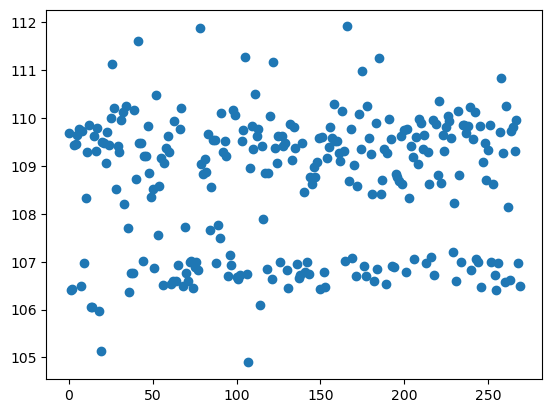

In [24]:
plt.scatter(range(len(bond_angles['Car - O - Nar'])), bond_angles['Car - O - Nar'][:,0])

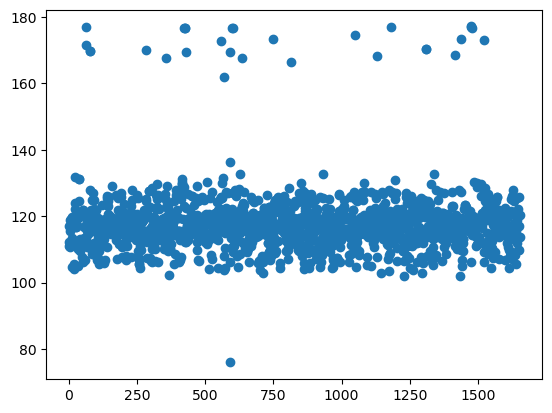

In [25]:
plt.scatter(np.arange(len(bond_angles['N - C - O'])), bond_angles['N - C - O'][:,0])

## Formula to calculate bond lengths

In [20]:
default_bondAngle = {'C':109, 'N':109, 'Car':120, 'Nar':120, 'Nam':120, 'Npl':120, 'Ntr':120, 'Sac', 'So', 'O.co', 'Cac', 
                   'Nox', 'N+', 'P+', 'O-', 'C+', 'Ng+', 'Sox', 'Pac', 'C-', 'S+'}

SyntaxError: ':' expected after dictionary key (80069225.py, line 1)

In [26]:
covalent_radii = torch.tensor([
  # Dummy, 1st row
  0.18, 0.32, 0.46,
  # 2nd row
  1.33, 1.02, 0.85, 0.75, 0.71, 0.63, 0.64, 0.67,
  # 3rd row
  1.55, 1.39, 1.26, 1.16, 1.11, 1.03, 0.99, 0.96,
  # 4th row K, Ca
  1.96, 1.71,
  # 1st row TM (Sc.. Zn)
  1.48, 1.36, 1.34, 1.22, 1.19, 1.16, 1.11, 1.10, 1.12, 1.18,
  # 4th row p-block (Ga..Kr)
  1.24, 1.21, 1.21, 1.16, 1.14, 1.17,
  # 5th row Rb, Sr
  2.10, 1.85,
  # 2nd row TM (Y..Cd)
  1.63, 1.54, 1.47, 1.38, 1.28, 1.25, 1.25, 1.20, 1.28, 1.36,
  # 5th row p-block (In..Xe)
  1.42, 1.40, 1.40, 1.36, 1.33, 1.31,
  # 6th row Cs, Ba
  2.32, 1.96,
  # Lanthanides La..Gd
  1.80, 1.63, 1.76, 1.74, 1.73, 1.72, 1.68,
  # Lanthanides Tb..Yb
  1.69, 1.68, 1.67, 1.66, 1.65, 1.64, 1.70,
  # 3rd row TM (Lu..Hg)
  1.62, 1.52, 1.46, 1.37, 1.31, 1.29, 1.22, 1.23, 1.24, 1.33,
  # 6th row p-block (Tl..Rn)
  1.44, 1.44, 1.51, 1.45, 1.47, 1.42,
  # 7th row Fr, Ra
  2.23, 2.01,
  # Actinides (Ac.. Am)
  1.86, 1.75, 1.69, 1.70, 1.71, 1.72, 1.66,
  # Actinides (Cm..No)
  1.66, 1.68, 1.68, 1.65, 1.67, 1.73, 1.76,
  # Trans-actinides
  1.61, 1.57, 1.49, 1.43, 1.41, 1.34, 1.29, 1.28, 1.21, 1.22, 1.36, 1.43, 1.62,
  1.75, 1.65, 1.57 ])

In [27]:
specialElements = ['Car', 'Nar', 'Nam', 'Npl', 'Ntr', 'HO', 'Sac', 'So', 'O.co', 'Cac', 
                   'Nox', 'N+', 'P+', 'O-', 'C+', 'Ng+', 'Sox', 'Pac', 'C-', 'S+']

In [28]:
atomic_numbers = {
    'H': 1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5, 'C': 6,  'N': 7,  'O': 8,  'F': 9,  'Ne': 10, 
    'Na': 11, 'Mg': 12,'Al': 13,'Si': 14,'P': 15, 'S': 16, 'Cl': 17, 'Ar': 18, 'K': 19, 
    'Ca': 20, 'Sc': 21, 'Ti': 22, 'V': 23, 'Cr': 24, 'Mn': 25, 'Fe': 26, 'Co': 27, 'Ni': 28,
    'Cu': 29, 'Zn': 30, 'Ga': 31, 'Ge': 32, 'As': 33, 'Se': 34, 'Br': 35, 'Kr': 36, 'Rb': 37,
    'Sr': 38, 'Y': 39, 'Zr': 40, 'Nb': 41, 'Mo': 42, 'Tc': 43, 'Ru': 44, 'Rh': 45, 'Pd': 46, 
    'Ag': 47, 'Cd': 48, 'In': 49, 'Sn': 50, 'Sb': 51, 'Te': 52, 'I': 53, 'Xe': 54, 'Cs': 55,
    'Ba': 56, 'La': 57, 'Ce': 58, 'Pr': 59, 'Nd': 60, 'Pm': 61, 'Sm': 62, 'Eu': 63, 'Gd': 64,
    'Tb': 65, 'Dy': 66, 'Ho': 67, 'Er': 68, 'Tm': 69, 'Yb': 70, 'Lu': 71, 'Hf': 72, 'Ta': 73,
    'W': 74,  'Re': 75, 'Os': 76, 'Ir': 77, 'Pt': 78, 'Au': 79, 'Hg': 80, 'Tl': 81, 'Pb': 82,
    'Bi':83, 'Po': 84, 'At': 85, 'Rn': 86, 'Fr': 87, 'Ra': 88, 'Ac': 89, 'Th': 90, 'Pa': 91,
    'U': 92, 'Np': 93,'Pu': 94,'Am': 95,'Cm': 96,'Bk': 97,'Cf': 98,'Es': 99,'Fm': 100, 'Md': 101, 
    'No': 102, 'Lr': 103, 'Rf': 104, 'Db': 105, 'Sg': 106, 'Bh': 107, 'Hs': 108, 'Mt': 109, 
    'Ds': 110, 'Rg': 111, 'Cn': 112, 'Nh': 113, 'Fl': 114, 'Mc': 115, 'Lv': 116, 'Ts': 117, 'Og': 118
}

In [29]:
def convertToAtomicNumber(atom: str) -> int:
    if atom in specialElements:
        return atomic_numbers[atom[0]]
    else:
        return atomic_numbers[atom]

In [30]:
def estimate_bond_length(single_bond_length : torch.Tensor, bond_order: float, q1 : int, q2: int) -> torch.Tensor:
    chargeEffect = 0.0685 * torch.sign(q1*q2) * torch.pow(torch.abs(q1*q2), torch.tensor(0.7384))
    return single_bond_length * (torch.pow(bond_order, torch.tensor(-0.2247)) + chargeEffect)

## Setting up the dataloader

In [31]:
''' The format of the pandas data frame is going to be:-
key, no. of entries, firstElement, secondElement, thirdElement, 
meanBondAngle, stdBondAngle, minBondAngle, maxBondLength and index same as key'''

list_bond_angles = []

for key in bond_angles.keys():
    bond = re.split(' - ', key.strip())
    firstElement = bond[0]
    secondElement = bond[1]
    thirdElement = bond[2]
    
    angles = bond_angles[key][:,0]
    new_row = {'No. of entries':len(angles), 'key': key, '1st Element': firstElement, '2nd Element': secondElement, 
               '3rd Element': thirdElement, 'Mean Bond Angle': angles.mean(), 'Std dev Bond Angle': angles.std(),
               'Max Bond Angle': angles.max(), 'Min Bond Angle': angles.min()}
    
    list_bond_angles.append(new_row)
    
df = pd.DataFrame(list_bond_angles)
df

,No. of entries,key,1st Element,2nd Element,3rd Element,Mean Bond Angle,Std dev Bond Angle,Max Bond Angle,Min Bond Angle
0,81,Cl - C - Npl,Cl,C,Npl,118.078460,3.381851,127.812311,112.577445
1,3209,C - C - Cl,C,C,Cl,114.204987,6.079778,179.449564,89.582987
2,23961,C - C - Npl,C,C,Npl,114.944894,8.337372,179.907406,46.961698
3,6270,C - Npl - H,C,Npl,H,117.190801,4.265362,137.466713,80.405518
4,15219,C - Npl - C,C,Npl,C,117.686802,6.951779,179.028149,50.587542
...,...,...,...,...,...,...,...,...,...
1481,1,C - So - Ng+,C,So,Ng+,93.666954,0.000000,93.666954,93.666954
1482,2,Nar - So - Nar,Nar,So,Nar,99.716931,0.496499,100.213430,99.220431
1483,2,N+ - B - Nar,N+,B,Nar,106.809254,0.009027,106.818282,106.800227
1484,1,H - S - P,H,S,P,92.322445,0.000000,92.322445,92.322445


In [33]:
def DataLoader(NO_OF_TRAIN_SAMPLES = 10) -> (list, list):
    
    bondAngles = list(range(0, len(bond_angles)))
    #weights = df['No. of entries'].to_numpy()
    
    indexes = random.choices(bondAngles, k = NO_OF_TRAIN_SAMPLES)
    train_X = []
    train_Y = []
    
    for i in indexes:
        entry = random.randrange(df.loc[i]["No. of entries"])
        key = df.iloc[i]["key"]
        datapoint = bond_angles[key][entry]
        atom1 = convertToAtomicNumber(df.loc[i]['1st Element'])
        atom2 = convertToAtomicNumber(df.loc[i]['2nd Element'])
        atom3 = convertToAtomicNumber(df.loc[i]['3rd Element'])
        
        hybridization = datapoint[7]
        ringSize1 = datapoint[8]
        ringSize2 = datapoint[9]
        ringSize3 = datapoint[10]
        
        charge_1 = torch.tensor(datapoint[2])
        charge_2 = torch.tensor(datapoint[3])
        charge_3 = torch.tensor(datapoint[4])
        bo1 = datapoint[5]
        bo2 = datapoint[6]
        
        bondLength1 = estimate_bond_length(torch.tensor(covalent_radii[atom1] + covalent_radii[atom2]),
                        bo1, charge_1, charge_2).detach().numpy()
        bondLength2 = estimate_bond_length(covalent_radii[atom2] + covalent_radii[atom3],
                        bo2, charge_2, charge_3)
                 
        '''Format -> atom 1,2,3, bond length1, bond order1, bond length2, bond order2, ringsize1, ringsize2, ringsize3'''
        train_X.append([atom1, atom2, atom3, covalent_radii[atom1],  covalent_radii[atom2], covalent_radii[atom3], datapoint[2], 
                        datapoint[3], datapoint[4],bondLength1, datapoint[5], bondLength2, datapoint[6], hybridization, ringSize1,
                        ringSize2, ringSize3])        
        train_Y.append([datapoint[0] - df.iloc[i]['Mean Bond Angle']])
                 
    return (np.array(train_X), np.array(train_Y))

DataLoader()

/var/folders/0m/5nzvp3cx1656wq7tyw8v8c6w0000gn/T/ipykernel_5510/2631138249.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bondLength1 = estimate_bond_length(torch.tensor(covalent_radii[atom1] + covalent_radii[atom2]),


(array([[ 5.00000000e+00,  7.00000000e+00,  6.00000000e+00,
          8.50000024e-01,  7.09999979e-01,  7.50000000e-01,
         -2.39700166e-01,  5.36919098e-02,  2.69963508e-01,
          1.49187379e+00,  1.20433718e+00,  1.44174332e+00,
          1.07204414e+00,  2.00000000e+00,  5.00000000e+00,
          0.00000000e+00,  6.00000000e+00],
        [ 6.00000000e+00,  6.00000000e+00,  1.50000000e+01,
          7.50000000e-01,  7.50000000e-01,  1.11000001e+00,
         -4.62225126e-02, -7.89059555e-02,  4.55206706e-01,
          1.50073375e+00,  1.00265625e+00,  1.96683403e+00,
          7.60939818e-01,  3.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 6.00000000e+00,  7.00000000e+00,  1.00000000e+00,
          7.50000000e-01,  7.09999979e-01,  3.19999993e-01,
         -1.37408195e-01, -1.28600047e-03,  2.23080268e-01,
          1.45756541e+00,  1.00797651e+00,  1.06207496e+00,
          8.71804273e-01,  2.00000000e+00,  0.00000000e+00,
          0.

In [36]:
def DataLoaderSelf(NO_OF_TRAIN_SAMPLES = 10) -> (list, list):
    
    bondAngles = list(range(0, len(bond_angles)))
    #weights = df['No. of entries'].to_numpy()
    
    indexes = random.choices(bondAngles, k = NO_OF_TRAIN_SAMPLES)
    train_X = []
    train_Y = []
    
    for i in indexes:
        entry = random.randrange(df.loc[i]["No. of entries"])
        key = df.iloc[i]["key"]
        datapoint = bond_angles[key][entry]
        atom1 = convertToAtomicNumber(df.loc[i]['1st Element'])
        atom2 = convertToAtomicNumber(df.loc[i]['2nd Element'])
        atom3 = convertToAtomicNumber(df.loc[i]['3rd Element'])
        
        hybridization = datapoint[7]
        ringSize1 = datapoint[8]
        ringSize2 = datapoint[9]
        ringSize3 = datapoint[10]
        
        charge_1 = torch.tensor(datapoint[2])
        charge_2 = torch.tensor(datapoint[3])
        charge_3 = torch.tensor(datapoint[4])
        bo1 = datapoint[5]
        bo2 = datapoint[6]
        
        bondLength1 = estimate_bond_length(torch.tensor(covalent_radii[atom1] + covalent_radii[atom2]),
                        bo1, charge_1, charge_2).detach().numpy()
        bondLength2 = estimate_bond_length(covalent_radii[atom2] + covalent_radii[atom3],
                        bo2, charge_2, charge_3)
        
        '''Format -> atom 1,2,3, bond length1, bond order1, bond length2, bond order2'''
        train_X.append([df.loc[i]['1st Element'], df.loc[i]['2nd Element'], df.loc[i]['3rd Element'], 
                        bondLength1, datapoint[5], bondLength2, datapoint[6], hybridization, ringSize1, ringSize2, ringSize3])        
        train_Y.append([datapoint[0]])
                 
    return (np.array(train_X), np.array(train_Y))

DataLoader()

/var/folders/0m/5nzvp3cx1656wq7tyw8v8c6w0000gn/T/ipykernel_5510/2631138249.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bondLength1 = estimate_bond_length(torch.tensor(covalent_radii[atom1] + covalent_radii[atom2]),


(array([[ 6.00000000e+00,  6.00000000e+00,  7.00000000e+00,
          7.50000000e-01,  7.50000000e-01,  7.09999979e-01,
          5.93693916e-02,  2.12853787e-01,  4.65109928e-03,
          1.41041515e+00,  1.33233473e+00,  1.49542041e+00,
          9.00433145e-01,  2.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 1.00000000e+00,  1.60000000e+01,  1.50000000e+01,
          3.19999993e-01,  1.02999997e+00,  1.11000001e+00,
         -2.53073806e-01,  3.81966818e-01,  1.94512976e-01,
          1.35702457e+00,  9.26081650e-01,  2.17946882e+00,
          9.63470851e-01,  3.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  6.00000000e+00],
        [ 1.00000000e+00,  7.00000000e+00,  1.50000000e+01,
          3.19999993e-01,  7.09999979e-01,  1.11000001e+00,
         -2.05847765e-01,  3.26850607e-01,  2.24577152e-01,
          1.05071124e+00,  8.78842544e-01,  1.78202690e+00,
          1.14949797e+00,  2.00000000e+00,  0.00000000e+00,
          0.

## Baseline ML models

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from lineartree import LinearTreeRegressor, LinearBoostRegressor, LinearForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [40]:
X_train, Y_train = DataLoader(1000000)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2)
Y_train = Y_train.flatten()

/var/folders/0m/5nzvp3cx1656wq7tyw8v8c6w0000gn/T/ipykernel_5510/2631138249.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bondLength1 = estimate_bond_length(torch.tensor(covalent_radii[atom1] + covalent_radii[atom2]),


In [38]:
# Writing the dataloader into a csv file for deep learning etc.
np.savetxt('bondAngle_Xtrain2.csv', X_train, header='Atom1,Atom2,Atom3,AtomSize1,AtomSize2,AtomSize3,BondLength1,BondOrder1,BondLength2,BondOrder2,RingSize1,RingSize2,RingSize3', delimiter=',')
np.savetxt('bondAngle_Ytrain2.csv', Y_train, header='BondAngle', delimiter=',')

np.savetxt('bondAngle_Xtest2.csv', X_test, header='Atom1,Atom2,Atom3,AtomSize1,AtomSize2,AtomSize3,BondLength1,BondOrder1,BondLength2,BondOrder2,RingSize1,RingSize2,RingSize3', delimiter=',')
np.savetxt('bondAngle_Ytest2.csv', Y_test, header='BondAngle', delimiter=',')

In [ ]:
# Initialize the models
linear_model = LinearRegression()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
linear_tree = LinearTreeRegressor(base_estimator=LinearRegression())

poly=PolynomialFeatures(degree=2, include_bias=False)
Polyregr = LinearRegression()


# Train the models
linear_model.fit(X_train, Y_train)
dt_model.fit(X_train, Y_train)
rf_model.fit(X_train, Y_train)
linear_tree.fit(X_train, Y_train)

poly_features=poly.fit_transform(X_train)
Polyregr.fit(poly_features, Y_train)


# Make predictions on the test set
linear_preds = linear_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
linear_tree_preds = linear_tree.predict(X_test)

poly_xTest=poly.fit_transform(X_test)
poly_preds=Polyregr.predict(poly_xTest)

#custom_formula_preds = custom_formula(X_test[:,1], X_test[:,4], X_test[:,6])


# Evaluate the models

linear_mae = mean_absolute_error(Y_test, linear_preds)
linear_r2 = r2_score(Y_test, linear_preds)

dt_mae = mean_absolute_error(Y_test, dt_preds)
dt_r2 = r2_score(Y_test, dt_preds)

rf_mae = mean_absolute_error(Y_test, rf_preds)
rf_r2 = r2_score(Y_test, rf_preds)

lineartree_mae = mean_absolute_error(Y_test, linear_tree_preds)
lineartree_r2 = r2_score(Y_test, linear_tree_preds)

poly_mae = mean_absolute_error(Y_test, poly_preds)
poly_r2 = r2_score(Y_test, poly_preds)

# Print the evaluation metrics

print("Linear Regression:")
print("Mean Absolute Error:", linear_mae)
print("R-squared:", linear_r2)
print()

print("Polynomial Regression:")
print("Mean Absolute Error:", poly_mae)
print("R-squared:", poly_r2)
print()

print("Decision Tree Regression:")
print("Mean Absolute Error:", dt_mae)
print("R-squared:", dt_r2)
print()

print("Random Forest Regression:")
print("Mean Absolute Error:", rf_mae)
print("R-squared:", rf_r2)
print()

print("Linear Tree Regression:")
print("Mean Absolute Error:", lineartree_mae)
print("R-squared:", lineartree_r2)

In [47]:
linear_forest = LinearForestRegressor(base_estimator=LinearRegression(), max_features=17)
linear_forest.fit(X_train, Y_train)
linear_forest_preds = linear_forest.predict(X_test)
linearforest_mae = mean_absolute_error(Y_test, linear_forest_preds)
linearforest_r2 = r2_score(Y_test, linear_forest_preds)

print("Linear Forest Regression:")
print("Mean Absolute Error:", linearforest_mae)
print("R-squared:", linearforest_r2)

Linear Forest Regression:
Mean Absolute Error: 0.31538197207074087
R-squared: 0.9656222365771407


In [ ]:
linear_boost = LinearBoostRegressor(base_estimator=LinearRegression(), max_features=17)
linear_boost.fit(X_train, Y_train)
linear_boost_preds = linear_boost.predict(X_test)
linearboost_mae = mean_absolute_error(Y_test, linear_boost_preds)
linearboost_r2 = r2_score(Y_test, linear_boost_preds)

print("Linear Boosted Forest Regression:")
print("Mean Absolute Error:", linearboost_mae)
print("R-squared:", linearboost_r2)

## Custom Formula

In [191]:
def calculateHybridization_Valency(atom2, bo1, bo2):
    if(atom2 in ['Car','C+','Cac']):
        if(bo1 < 1.2 and bo2 < 1.2): 
            return 4.
        else: 
            return 3.
    
    elif(atom2 in ['C','C-','Si','B','B+', 'Se']):
        return 4.
    
    elif (atom2 in ['N','O', 'O-', 'Ng+', 'Nar', 'Nam', 'Npl', 'Ntr', 'Nox', 'N+', 'O.co']):
        return 4.
    
    elif (atom2 in ['S','S+','So']):
        return 4.
    
    elif (atom2 in ['Sox','Sac']):
        return 6.
    
    elif (atom2 in ['P', 'P+', 'Pac']):
        return 5.

In [31]:
def custom_formula(atom, bo1, bo2, hybridization, Ytest):
    res = []
    for i in range(len(atom)):
        #den = calculateHybridization_Valency(atom[i], bo1[i], bo2[i]) - bo1[i] - bo2[i]
        den = 5 - bo1[i] - bo2[i]
        if(hybridization[i] == 2.0 and (bo1[i]+bo2[i]<2.4)): den = 4 - bo1[i] - bo2[i]
        angle = np.degrees(np.arccos(-1/den))
        res.append(angle)
        print(atom[i], bo1[i], bo2[i], angle, Ytest[i])
    return res

In [35]:
custom_formula_preds = custom_formula(X_test[:,1], np.array(X_test[:,4], dtype=np.float64), np.array(X_test[:,6], dtype=np.float64), X_test[:,7], Y_test)

# Evaluate the models
custom_formula_mse = mean_absolute_error(Y_test, custom_formula_preds)
custom_formula_r2 = r2_score(Y_test, custom_formula_preds)
                             
print("Custom Formula:")
print("Mean Squared Error:", custom_formula_mse)
print("R-squared:", custom_formula_r2)
print()

C 0.8734314730235087 0.9218643493868163 108.18229076486914 [112.53638104]
O 1.1796141278434797 1.087955229382568 111.46756879637611 [106.77408568]
Nam 1.0007912856453676 1.0804334688707848 110.03593622403635 [117.49738713]
N 1.6620431645562803 1.0871587396148945 116.37772077435912 [123.32232025]
Nam 1.2432884010617506 1.255506314985705 113.56612914287294 [122.66657025]
So 0.7660678172058366 0.8126157024608194 106.99481424453197 [96.44001229]
Nam 0.9974852500546457 0.9510498408480481 109.12992874770462 [112.7048522]
N 1.5387428016136055 1.114567102286117 115.22234328617864 [110.74435389]
Se 1.0037856154338989 0.9202806582265854 108.97190825380984 [93.49511568]
Sac 0.7227281245029046 1.2619690071819014 109.36844691301545 [102.21755004]
Car 1.238771152176719 0.9768897627758482 111.04810560726997 [117.47629995]
C 0.9822615661230462 1.1963873903466598 110.75913448460197 [113.10076327]
S 0.6861185079280673 0.6860397570048271 106.0005142016701 [174.44066281]
Nox 0.9792500385903812 1.067387744

In [36]:
custom_formula_preds

[108.18229076486914,
 111.46756879637611,
 110.03593622403635,
 116.37772077435912,
 113.56612914287294,
 106.99481424453197,
 109.12992874770462,
 115.22234328617864,
 108.97190825380984,
 109.36844691301545,
 111.04810560726997,
 110.75913448460197,
 106.0005142016701,
 109.79142728998276,
 105.45560595509369,
 108.08681284761104,
 109.21585705447929,
 108.75820785038398,
 109.28223544287039,
 109.93622046382477,
 111.9256536665793,
 112.91114007921983,
 105.44872109311083,
 116.27134218089945,
 107.809429416292,
 106.9077199119115,
 110.7495048049471,
 113.7956266535987,
 113.95757396060215,
 105.0276721144488,
 108.25987403742353,
 109.4924959854123,
 112.66824557654753,
 106.57860005682689,
 107.61728750285074,
 110.03921981359755,
 107.27328716096679,
 107.9489157077247,
 106.77139882305484,
 112.22539166975587,
 111.8163620433081,
 108.38179573239464,
 107.72009229689004,
 109.19160818399638,
 108.83165788235891,
 118.69391227303993,
 110.03923654306624,
 107.0038760416179,
 107

In [165]:
-1/(calculateHybridization_Valency('Car', 1.3923802869526538, 0.8125514988266849) - 1.3923802869526538 - 0.8125514988266849)

-1.257753714856047

In [ ]:
for key in bond_angles.keys():
    plt.title(key)
    plt.scatter(range(len(bond_angles[key])), bond_angles[key][:,0])
    plt.show()

In [ ]:
for key in bond_angles:
    for i in bond_angles[key]:
        if(i[0]>160): print(key, i)

In [ ]:
X = []
Y = []
x_ = []
y_ = []

for key in bond_angles:
    for i in bond_angles[key]:
        if(i[-4]==1): 
            x = (4-i[-5]-i[-6])
            print(key, i[-5]+i[-6], 160 + 20*np.exp(-np.power(x, 0.8)) , i)
            if(i[0]>=160):
                X.append(i[-5]+i[-6])
                Y.append(i[0])
                x_.append(i[1:])
                y_.append(i[0])

/var/folders/0m/5nzvp3cx1656wq7tyw8v8c6w0000gn/T/ipykernel_17893/52211396.py:2: RuntimeWarning: invalid value encountered in arccos
  return np.degrees(np.arccos(-1/( x - 1.60824711e+00 - 2.08295276e+00)))


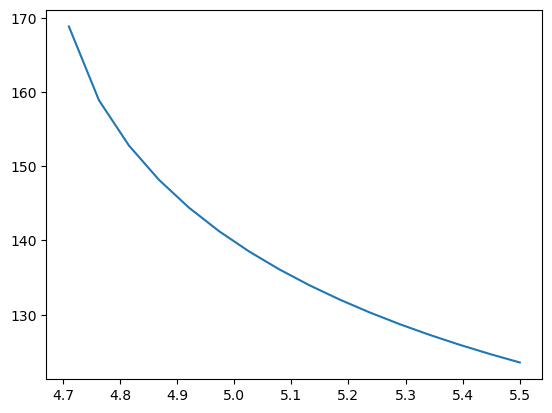

In [21]:
def temp(x):
    return np.degrees(np.arccos(-1/( x - 1.60824711e+00 - 2.08295276e+00)))

x = np.linspace(4.5, 5.5, 20)
y = temp(x)
plt.plot(x, y)

## Deep Learning model

In [33]:
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

In [68]:
class BondAngleDataset(data.Dataset):
    def __init__(self, X_param_csv_file, Y_csv_file):
        self.Xdata = pd.read_csv(X_param_csv_file)
        self.Ydata = pd.read_csv(Y_csv_file)
        
        self.x = self.Xdata.loc[:,['# Atom1', 'Atom2', 'Atom3', 'BondLength1', 'BondOrder1', 'BondLength2', 'BondOrder2', 
                            'RingSize1', 'RingSize2', 'RingSize3']].values
        self.y = self.Ydata['# BondAngle'].values

    def __len__(self):
        return len(self.Xdata)

    def __getitem__(self, index):
        return torch.tensor(self.x[index], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

#CSV file named 'bond_angle_data.csv'
dataset = BondAngleDataset('bondAngle_Xtrain2.csv', 'bondAngle_Ytrain2.csv')
dataloader = data.DataLoader(dataset, batch_size=64, shuffle=True)

In [69]:
class BondAnglePredictor(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(BondAnglePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.relu2 = nn.Softmax()
        self.fc3 = nn.Linear(hidden_size_2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

In [212]:
def train(model, dataloader, criterion, optimizer, epochs):
    for epoch in range(epochs):
        total_loss = 0
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(dataloader)}")

# Define the input, hidden, and output sizes of the model
input_size = 10  # Number of input parameters
hidden_size_1 = 2000  # Number of hidden units 1
hidden_size_2 = 300  # Number of hidden units 2
hidden_size_3 = 50  # Number of hidden units 3
output_size = 1  # Output is a single predicted bond angle

# Create the model, loss function, and optimizer
model = BondAnglePredictor(input_size, hidden_size_1, hidden_size_2, output_size)
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model for 10 epochs
train(model, dataloader, criterion, optimizer, epochs=100)

/var/folders/0m/5nzvp3cx1656wq7tyw8v8c6w0000gn/T/ipykernel_11903/3734495263.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.relu2(x)
/Users/mayankgoel/miniconda3/envs/GSOC/lib/python3.11/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 1/100, Loss: 4.027394912719727
Epoch 2/100, Loss: 4.02772208849589
Epoch 3/100, Loss: 4.027878225962321
Epoch 4/100, Loss: 4.027325365066528
Epoch 5/100, Loss: 4.027733200709025
Epoch 6/100, Loss: 4.027475646972656
Epoch 7/100, Loss: 4.027799075444539


KeyboardInterrupt: 

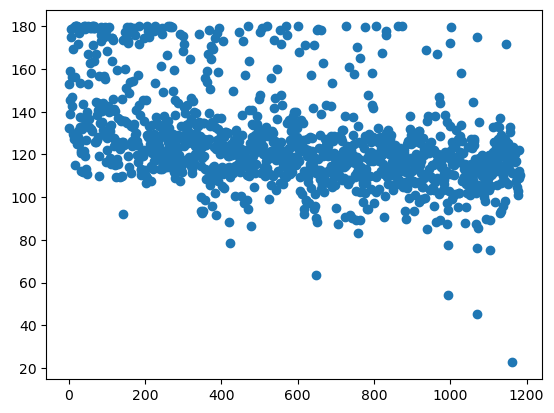

In [37]:
plt.scatter(range(len(df['Max Bond Angle'])), df['Max Bond Angle'].to_numpy())